# Handling missing data

When analyzing tabular data, sometimes table cells are present that do not contain data. In Python, this typically means the value is _Not a Number_, or [`NaN`](https://en.wikipedia.org/wiki/NaN). We need to deal with these NaN entries differently, and this notebook will introduce how.

To get a first view where NaNs play a role, we load again some example data from a CSV file. This file uses a semicolon as separator or delimiter...we can provide pandas with this information.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
# Now that we know about our datatypes, we can provide this info when loading the DataFrame
# - parse timestamp to datetime and set as index
# - parse label to string, valid to boolean
df = pd.read_csv('data/converted_measuremets.csv', index_col=0, parse_dates=True, dtype={'label': 'string', 'valid': 'boolean'})
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11 entries, 2023-01-01 07:00:00 to 2023-01-01 20:00:00
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   11 non-null     string 
 1   valid   10 non-null     boolean
 2   value1  10 non-null     float64
 3   value2  8 non-null      float64
 4   value3  9 non-null      float64
 5   value4  10 non-null     float64
 6   value5  8 non-null      float64
dtypes: boolean(1), float64(5), string(1)
memory usage: 638.0 bytes


In [18]:
df

,label,valid,value1,value2,value3,value4,value5
timestamp,,,,,,,
2023-01-01 07:00:00,A,True,9.0,2.0,3.1,0.98,1.23
2023-01-01 08:00:00,B,False,11.0,NaN,0.4,0.40,1.11
2023-01-01 10:00:00,D,True,9.5,5.0,NaN,2.56,NaN
2023-01-01 10:15:00,C,True,10.2,8.0,5.6,NaN,NaN
2023-01-01 11:00:00,E,False,15.0,7.0,4.4,3.14,2.34
2023-01-01 12:00:00,F,True,400.0,NaN,2.2,2.71,2.45
2023-01-01 16:00:00,G,False,9.0,1.0,1.1,3.58,0.98
2023-01-01 17:00:00,H,True,11.0,4.0,0.9,4.12,1.05
2023-01-01 18:00:00,I,True,11.3,6.0,3.3,3.33,1.67


## Examine missing data
As you can see, there are rows containing NaNs. A check if there are NaNs anywhere in a DataFrame is an important quality check at the beginning of any analysis task and good scientific practice.

Pandas' [`isnull`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html) provides a boolean masking of the DataFrame with `True / False` values, where `True` indicates a NaN.

In [19]:
df.isnull()

,label,valid,value1,value2,value3,value4,value5
timestamp,,,,,,,
2023-01-01 07:00:00,False,False,False,False,False,False,False
2023-01-01 08:00:00,False,False,False,True,False,False,False
2023-01-01 10:00:00,False,False,False,False,True,False,True
2023-01-01 10:15:00,False,False,False,False,False,True,True
2023-01-01 11:00:00,False,False,False,False,False,False,False
2023-01-01 12:00:00,False,False,False,True,False,False,False
2023-01-01 16:00:00,False,False,False,False,False,False,False
2023-01-01 17:00:00,False,False,False,False,False,False,False
2023-01-01 18:00:00,False,False,False,False,False,False,False


With this boolean masking, we can do some further analysis. And since `True / False` can also be interpreted as `1 / 0`, we also can do math with it.

In [20]:
# Check if there are any NaN in the data
df.isna().values.any()

np.True_

In [21]:
# Get a column-wise overview of NaN and count them
df.isnull().sum().sort_values(ascending=False)

value2    3
value5    3
value3    2
valid     1
value1    1
value4    1
label     0
dtype: int64

In [22]:
# Compute the column-wise percentage of NaN
df.isnull().mean().sort_values(ascending=False) * 100

value2    27.272727
value5    27.272727
value3    18.181818
valid      9.090909
value1     9.090909
value4     9.090909
label      0.000000
dtype: float64

For most DataFrame methods, we can provide the parameter `axis`, determining whether the computation should be done on the columns or the rows / index.

In [23]:
# Compute the row-wise percentage of NaN
df.isnull().mean(axis=1).sort_values(ascending=False) * 100

timestamp
2023-01-01 20:00:00    71.428571
2023-01-01 10:00:00    28.571429
2023-01-01 10:15:00    28.571429
2023-01-01 08:00:00    14.285714
2023-01-01 12:00:00    14.285714
2023-01-01 07:00:00     0.000000
2023-01-01 11:00:00     0.000000
2023-01-01 16:00:00     0.000000
2023-01-01 17:00:00     0.000000
2023-01-01 18:00:00     0.000000
2023-01-01 19:00:00     0.000000
dtype: float64

We may also want to the subset of rows containing NaNs. Here, we can combine the indexing with a boolean masking for existing NaN:

In [24]:
df.loc[df.isnull().any(axis=1)]

,label,valid,value1,value2,value3,value4,value5
timestamp,,,,,,,
2023-01-01 08:00:00,B,False,11.0,NaN,0.4,0.40,1.11
2023-01-01 10:00:00,D,True,9.5,5.0,NaN,2.56,NaN
2023-01-01 10:15:00,C,True,10.2,8.0,5.6,NaN,NaN
2023-01-01 12:00:00,F,True,400.0,NaN,2.2,2.71,2.45
2023-01-01 20:00:00,K,<NA>,NaN,NaN,NaN,3.87,NaN


## Handling NaNs - Drop data

Depending on what kind of data analysis should be performed, it might make sense to just ignore rows and columns that contain NaN values. Alternatively, it is possible to delete rows or columns that contain NaNs. We may also use different methods to impute missing data and fill the gaps, where we should consider that those values may not represent the "real world" and may have an impact on further data analysis.

It always depends on your project, the data, and what is important or not for your analysis. It's not an easy answer. Whatever the solution will be, it should be documented and this info should also be provided in any scientific publication based on this data.

In this case, we'll use [`dropna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) to remove all rows (`index`) which have `any` missing data.

In [25]:
df_no_nan = df.dropna(axis='index', how='any')
df_no_nan.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2023-01-01 07:00:00 to 2023-01-01 19:00:00
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   6 non-null      string 
 1   valid   6 non-null      boolean
 2   value1  6 non-null      float64
 3   value2  6 non-null      float64
 4   value3  6 non-null      float64
 5   value4  6 non-null      float64
 6   value5  6 non-null      float64
dtypes: boolean(1), float64(5), string(1)
memory usage: 348.0 bytes


We can now also check again if NaNs are present.

In [26]:
df_no_nan.isnull().values.any()

np.False_

## Exercise

Instead of removing rows with any missing data, remove all rows that contain more than 50% of NaN. Refer to the docs for [`dopna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) for help.

## Handling NaNs - Imputation

Instead of dropping incomplete data, we can try to impute data to fill the gaps. Pandas provides basic methods to [fill missing data](https://pandas.pydata.org/docs/user_guide/missing_data.html#filling-missing-data), while other libraries also provide more sophisticated approaches, e.g.:
* [scikit-learn - Imputation of missing values](https://scikit-learn.org/stable/modules/impute.html)

In [27]:
# Fill missing numerical values with the mean of the column
df.fillna(df.select_dtypes(include='number').mean())

,label,valid,value1,value2,value3,value4,value5
timestamp,,,,,,,
2023-01-01 07:00:00,A,True,9.0,2.00,3.100000,0.980,1.230
2023-01-01 08:00:00,B,False,11.0,5.25,0.400000,0.400,1.110
2023-01-01 10:00:00,D,True,9.5,5.00,2.788889,2.560,1.715
2023-01-01 10:15:00,C,True,10.2,8.00,5.600000,2.767,1.715
2023-01-01 11:00:00,E,False,15.0,7.00,4.400000,3.140,2.340
2023-01-01 12:00:00,F,True,400.0,5.25,2.200000,2.710,2.450
2023-01-01 16:00:00,G,False,9.0,1.00,1.100000,3.580,0.980
2023-01-01 17:00:00,H,True,11.0,4.00,0.900000,4.120,1.050
2023-01-01 18:00:00,I,True,11.3,6.00,3.300000,3.330,1.670


In [28]:
# Fill missing boolean values with the most frequent one
df.fillna(df.select_dtypes(include='boolean').mode().iloc[0])

,label,valid,value1,value2,value3,value4,value5
timestamp,,,,,,,
2023-01-01 07:00:00,A,True,9.0,2.0,3.1,0.98,1.23
2023-01-01 08:00:00,B,False,11.0,NaN,0.4,0.40,1.11
2023-01-01 10:00:00,D,True,9.5,5.0,NaN,2.56,NaN
2023-01-01 10:15:00,C,True,10.2,8.0,5.6,NaN,NaN
2023-01-01 11:00:00,E,False,15.0,7.0,4.4,3.14,2.34
2023-01-01 12:00:00,F,True,400.0,NaN,2.2,2.71,2.45
2023-01-01 16:00:00,G,False,9.0,1.0,1.1,3.58,0.98
2023-01-01 17:00:00,H,True,11.0,4.0,0.9,4.12,1.05
2023-01-01 18:00:00,I,True,11.3,6.0,3.3,3.33,1.67


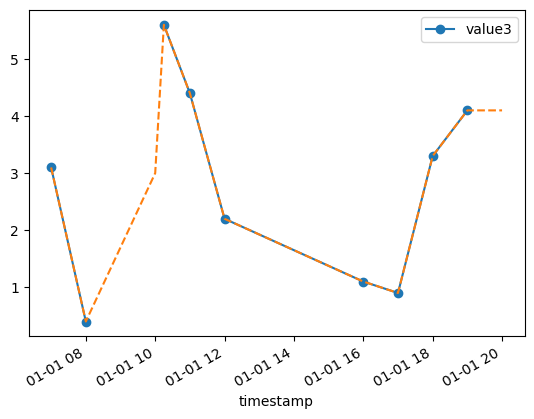

In [29]:
# We can also try to interpolate missing values
df['value3'].plot(style="o-", legend=True)
# Interpolate privides different methods, e.g linear, quadratic, etc
df['value3'].interpolate(method='linear').plot(style="--")
plt.show()

## Exercise

Lets combine all this to
* fill missing boolean values via mode
* fill missing numerical values by linear interpolation

You may want to consider the use of [`apply()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html), to apply according methods to each column.

Save the result to `data/filled_measurements.csv`